# Ahmed Hossameldin Mohamed-plab-3

Note: I have used ChatGPT to generate __DocStrings only__ for my funtions

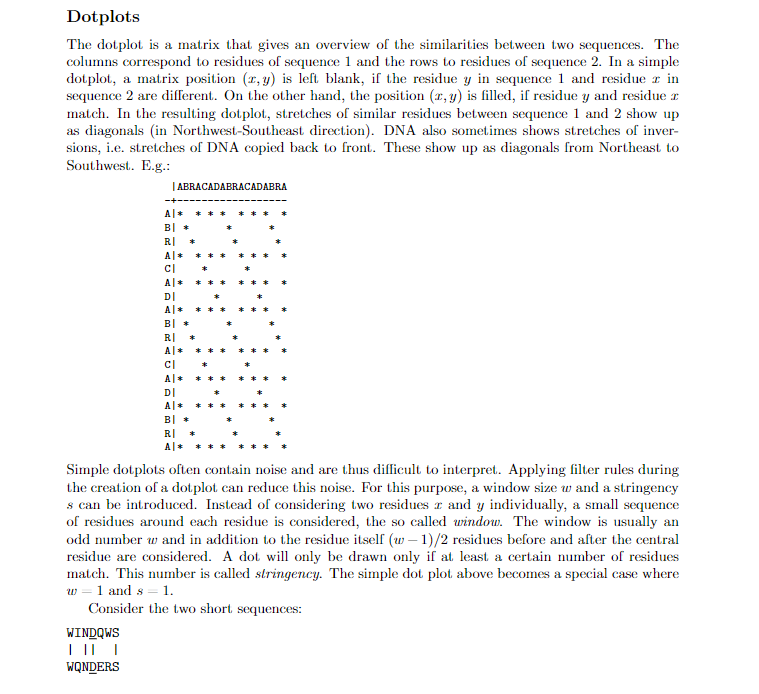

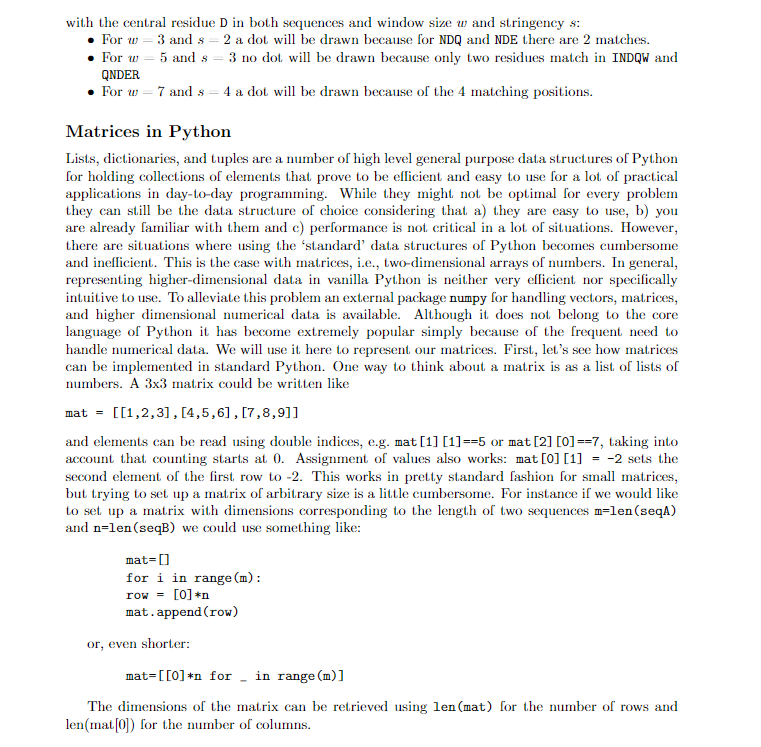

### Ex.1: Matrices as lists of lists

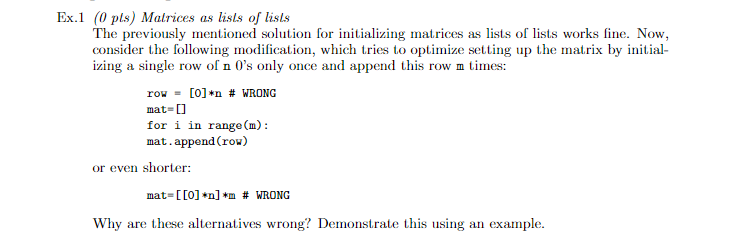

In [3]:
m = 3  # Number of rows
n = 4  # Number of columns

def create_matrix(n,m):
    # Appending the same row multiple times
    row = [0] * n
    mat = []
    for i in range(m):
        mat.append(row)

    return mat

mat = create_matrix(n,m)
print(f"Before adjustment - Matrix 1: {mat}")

# Modifying the first element of the first row in mat
mat[0][0] = 1

print(f"After adjustment - Matrix 1: {mat}")

Before adjustment - Matrix 1: [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
After adjustment - Matrix 1: [[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]]


As we see in the previous example, The alternatives provided are incorrect because they create references to the same row object multiple times. As a result, modifying one row will affect all other rows.

### Ex.2 (20 pts) The Dotplot matrix

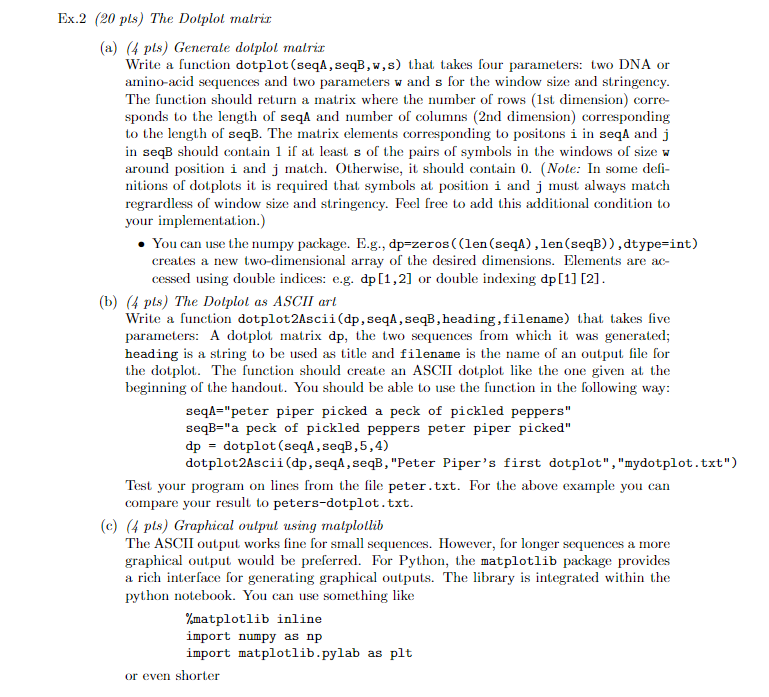

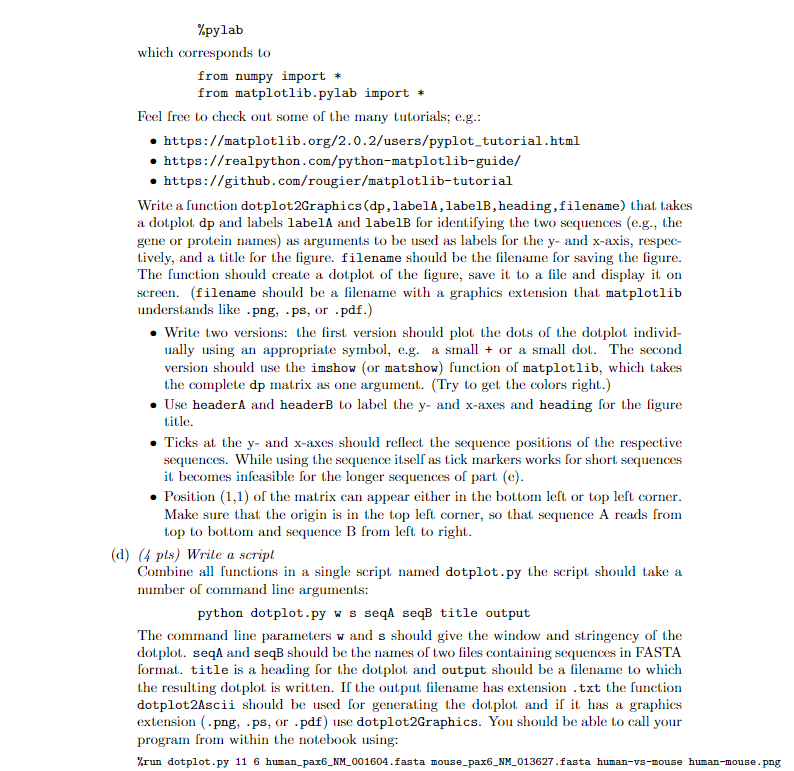

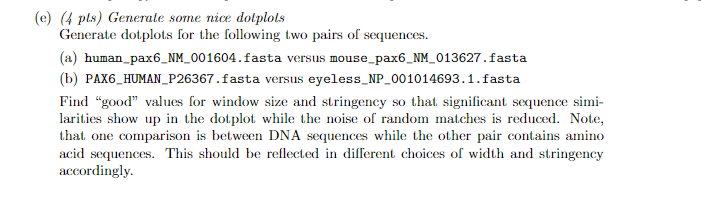

#### a) Generate dotplot matrix

In [4]:
import numpy as np

def dotplot(seqA, seqB, w, s):
    """
    Generate a dotplot matrix for two sequences.

    Args:
    - seqA: First sequence (string)
    - seqB: Second sequence (string)
    - w: Window size (int)
    - s: Stringency (int)

    Returns:
    - Dotplot matrix (NumPy array)
    """

    # Initialize the dotplot matrix
    dp = np.zeros((len(seqA), len(seqB)), dtype=int)

    # Iterate over positions in seqA
    for i in range(len(seqA)):
        # Define the window for seqA
        start_A = max(0, i - (w - 1) // 2)
        end_A = min(len(seqA), i + (w + 1) // 2)

        # Iterate over positions in seqB
        for j in range(len(seqB)):
            # Define the window for seqB
            start_B = max(0, j - (w - 1) // 2)
            end_B = min(len(seqB), j + (w + 1) // 2)

            # Count the matches within the window
            matches = sum(seqA[x] == seqB[y] for x in range(start_A, end_A) for y in range(start_B, end_B))

            # If number of matches is at least s, set dotplot value to 1
            if matches >= s:
                dp[i, j] = 1

    return dp

# Test the function
seqA = "WINDQWS"
seqB = "WQNDERS"
w = 3
s = 2
result = dotplot(seqA, seqB, w, s)
print(result)


[[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 1 1 1 0 0 0]
 [1 1 1 0 0 0 0]
 [1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


#### b) The Dotplot as ASCII art

In [5]:
def dotplot2Ascii(dp, seqA, seqB, heading, filename):
    """
    Create an ASCII dotplot from the dotplot matrix and save it to a file.

    Args:
    - dp: Dotplot matrix (NumPy array)
    - seqA: First sequence (string)
    - seqB: Second sequence (string)
    - heading: Title for the dotplot (string)
    - filename: Name of the output file (string)
    """
    with open(filename, "w") as file:
        # Write heading
        file.write(heading + "\n\n" + "  ")
        for i in seqB: file.write(i)
        file.write("\n")
        file.write("-+" + "-" * len(seqB) + "\n")

        # Write dotplot
        for i, row in enumerate(dp):
            file.write(seqA[i] + "|")
            for val in row:
                if val == 1:
                    file.write("*")
                else:
                    file.write(" ")
            file.write("\n")

# Test the function
seqA = "peter piper picked a peck of pickled peppers"
seqB = "a peck of pickled peppers peter piper picked"
dp = dotplot(seqA, seqB, 5, 4)
dotplot2Ascii(dp, seqA, seqB, "Peter Piper's first dotplot", "Peter-ASCIIart.txt")

In [6]:
# Test the function
seqA = "ABRACADABRACADABRA"
seqB = "ABRACADABRACADABRA"
dp = dotplot(seqA, seqB, 2, 1)
dotplot2Ascii(dp, seqA, seqB, "The First Example", "1stExample-ASCIIart.txt")

#### c) Graphical output using matplotlib - Version 1

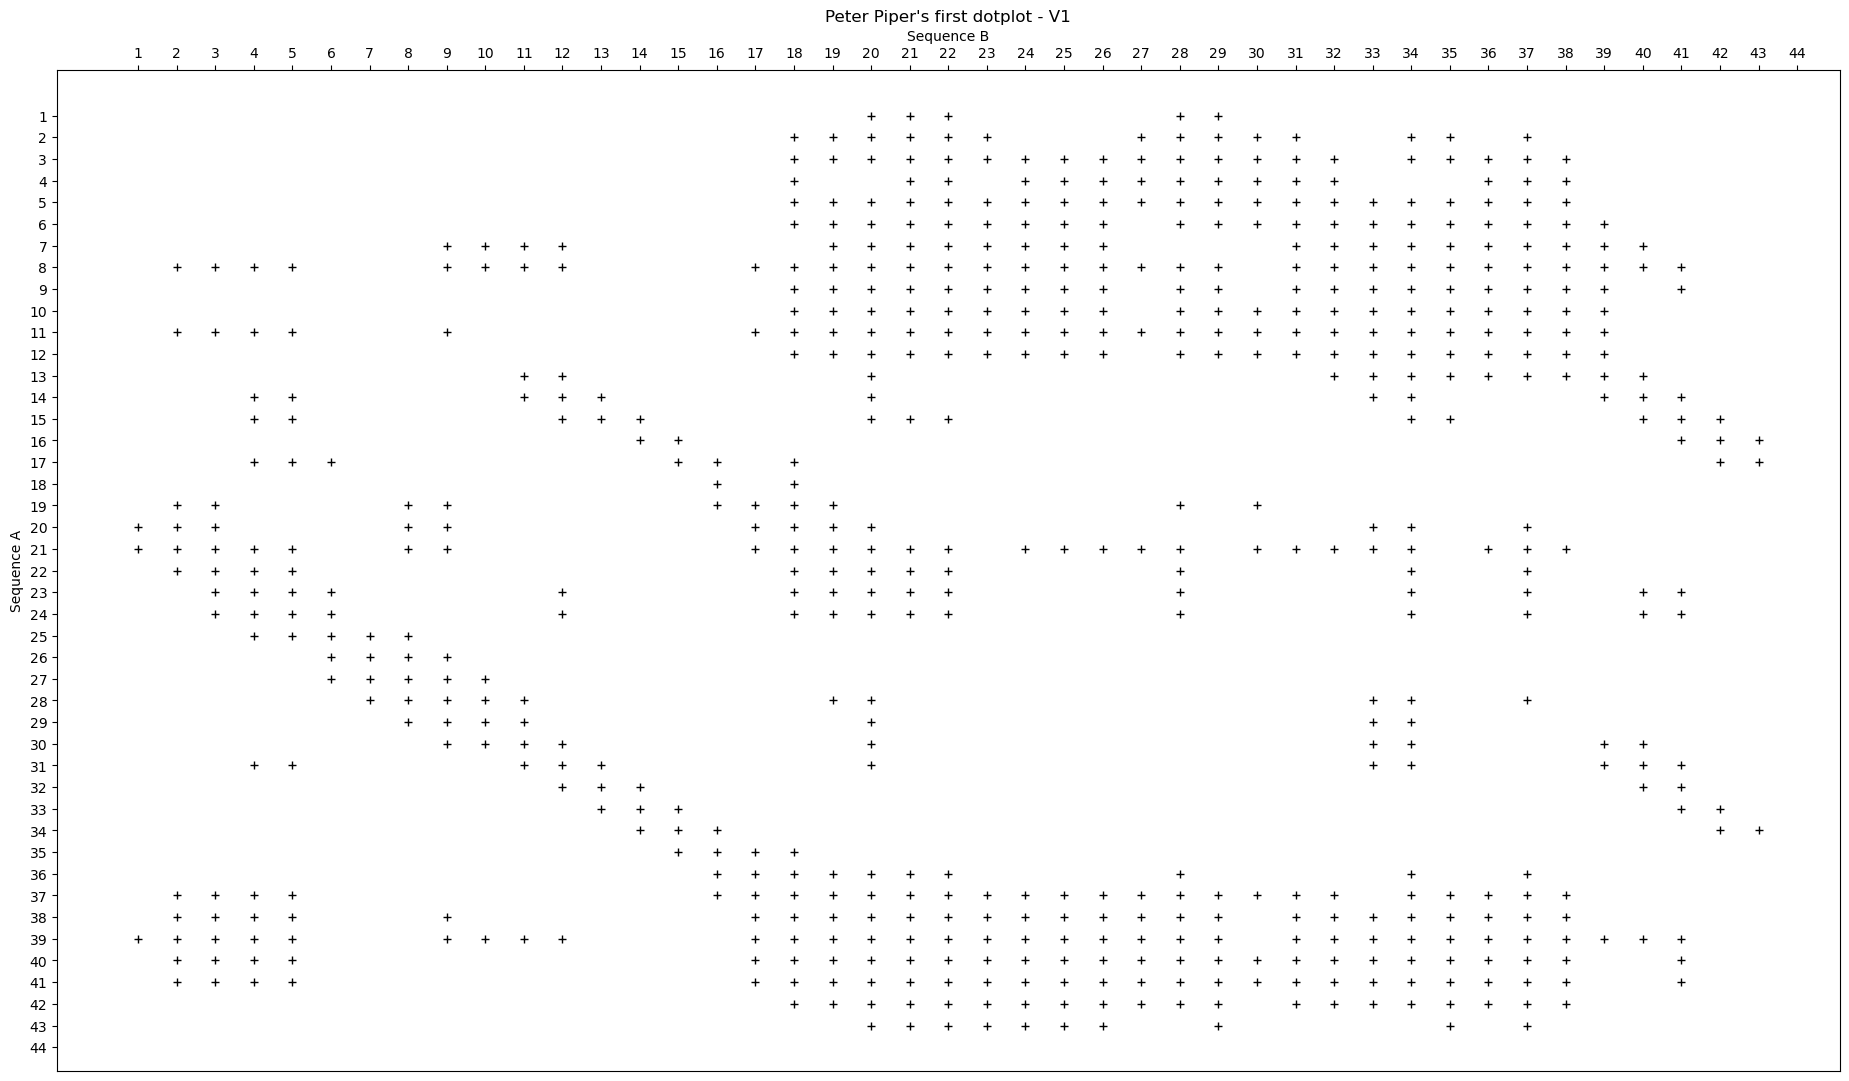

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def dotplot2Graphics(dp, labelA, labelB, heading, filename):
    """
    Create a graphical dotplot from the dotplot matrix using Matplotlib.

    Args:
    - dp: Dotplot matrix (NumPy array)
    - labelA: Label for the y-axis (string)
    - labelB: Label for the x-axis (string)
    - heading: Title for the figure (string)
    - filename: Name of the output file (string)
    """
    # Create figure
    fig, ax = plt.subplots()
    
    # Plot individual dots
    for i in range(dp.shape[0]):
        for j in range(dp.shape[1]):
            if dp[i, j] == 1:
                ax.plot(j, i, 'k+')  # Black plus symbol for dot
                
    # Set labels and title
    ax.set_ylabel(labelA)
    ax.set_xlabel(labelB)
    ax.xaxis.set_label_position('top')
    ax.set_title(heading)

    # Set ticks to reflect sequence positions
    if len(dp) < 100:
        ax.set_xticks(np.arange(len(dp)))
        ax.set_yticks(np.arange(len(dp)))
        ax.set_xticklabels(np.arange(1, len(dp)+1))
        ax.set_yticklabels(np.arange(1, len(dp)+1))
    
    # Invert y-axis to have sequence A read from top to bottom
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    fig.set_size_inches(23, 13, forward=True)
    
    # Save the figure
    plt.savefig(filename)
    
    # Display the figure
    plt.show()

# Test the function
seqA = "peter piper picked a peck of pickled peppers"
seqB = "a peck of pickled peppers peter piper picked"
dp = dotplot(seqA, seqB, 5, 4)
dotplot2Graphics(dp, "Sequence A", "Sequence B", "Peter Piper's first dotplot - V1", "V1-Peterdotplot.png")

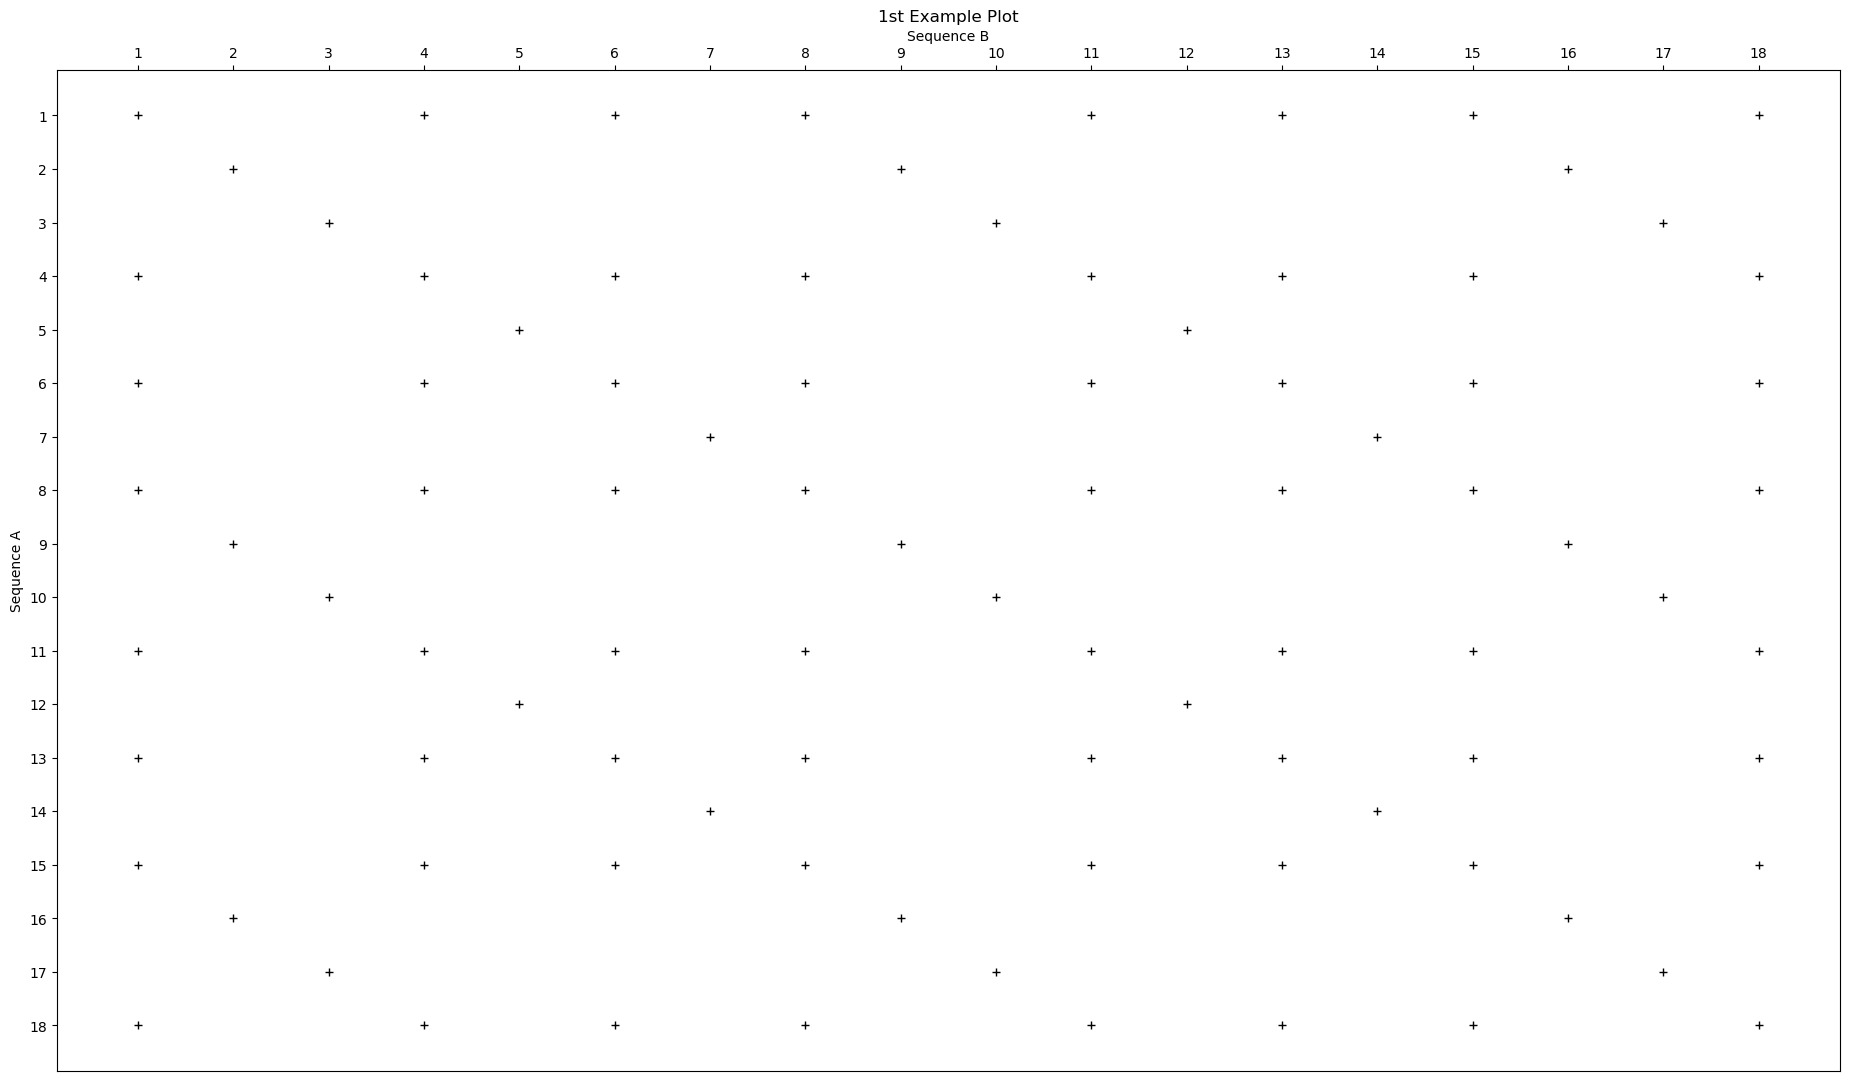

In [8]:
# Test the function
seqA = "ABRACADABRACADABRA"
seqB = "ABRACADABRACADABRA"
dp = dotplot(seqA, seqB, 2, 1)
dotplot2Graphics(dp, "Sequence A", "Sequence B", "1st Example Plot", "V1-1stExample.png")

#### c) Graphical output using matplotlib - Version 2

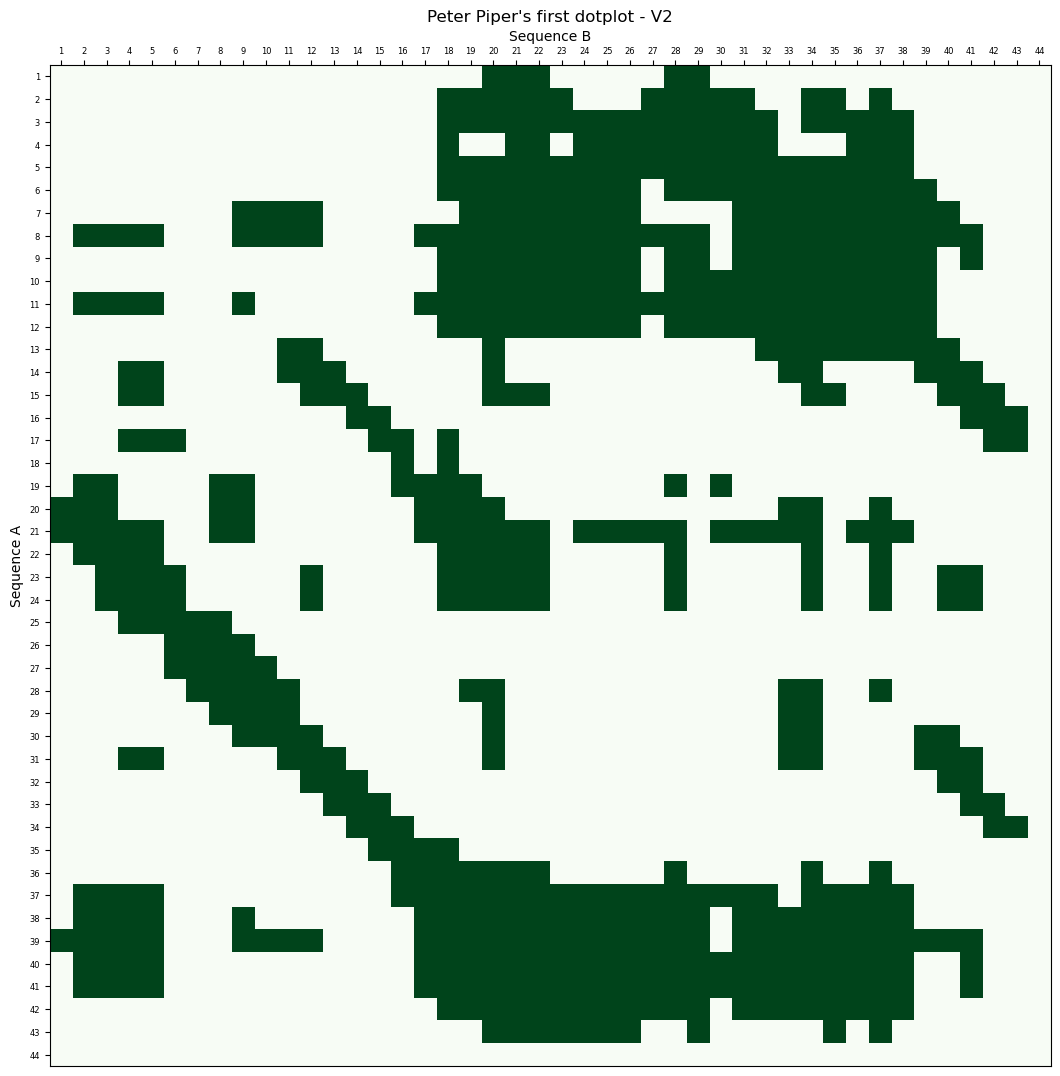

In [9]:
def dotplot2Graphics(dp, labelA, labelB, heading, filename):
    """
    Create a graphical dotplot from the dotplot matrix using Matplotlib's imshow function.

    Args:
    - dp: Dotplot matrix (NumPy array)
    - labelA: Label for the y-axis (string)
    - labelB: Label for the x-axis (string)
    - heading: Title for the figure (string)
    - filename: Name of the output file (string)
    """
    # Create figure
    fig, ax = plt.subplots()
    
    # Plot the dotplot using imshow
    ax.imshow(dp, cmap='Greens', interpolation='nearest')
    
    # Set labels and title
    ax.set_ylabel(labelA)
    ax.set_xlabel(labelB)
    ax.xaxis.set_label_position('top')
    ax.set_title(heading)
    
    # Set ticks to reflect sequence positions
    if len(dp) < 100:
        ax.set_xticks(np.arange(len(dp)))
        ax.set_yticks(np.arange(len(dp)))
        ax.set_xticklabels(np.arange(1, len(dp)+1), fontsize=6)
        ax.set_yticklabels(np.arange(1, len(dp)+1), fontsize=6)


    # Invert y-axis to have sequence A read from top to bottom
    ax.xaxis.tick_top()

    fig.set_size_inches(23, 13, forward=True)
    
    # Save the figure
    plt.savefig(filename)
    
    # Display the figure
    plt.show()

# Test the function
seqA = "peter piper picked a peck of pickled peppers"
seqB = "a peck of pickled peppers peter piper picked"
dp = dotplot(seqA, seqB, 5, 4)
dotplot2Graphics(dp, "Sequence A", "Sequence B", "Peter Piper's first dotplot - V2", "V2-Peterplot.png")


#### e) Generate some nice dotplots

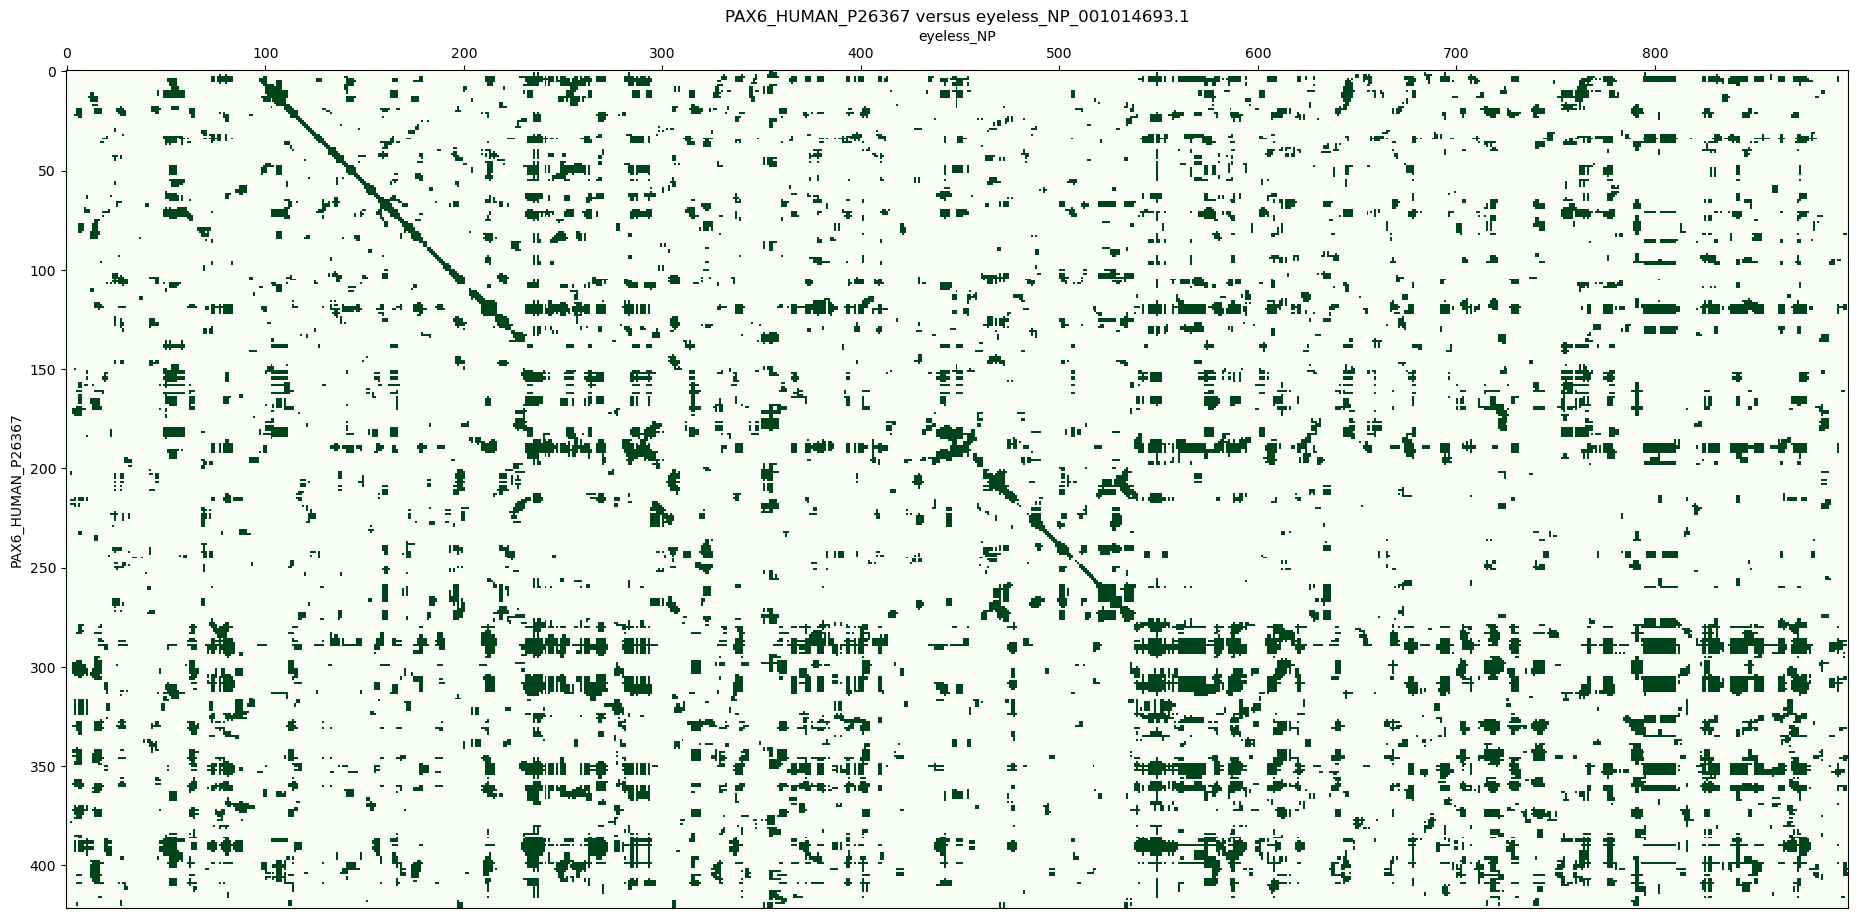

In [10]:
# PAX6_HUMAN_P26367.fasta versus eyeless_NP_001014693.1.fasta
with open('PAX6_HUMAN_P26367.fasta', "r") as file:
        seqA = file.read().strip().split('\n', 1)[1].replace('\n', '')

with open('eyeless_NP_001014693.1.fasta', "r") as file:
        seqB = file.read().strip().split('\n', 1)[1].replace('\n', '')

dp = dotplot(seqA, seqB, 5, 4)
dotplot2Graphics(dp, "PAX6_HUMAN_P26367", "eyeless_NP", "PAX6_HUMAN_P26367 versus eyeless_NP_001014693.1", "Pax_vs_eyeless.png")

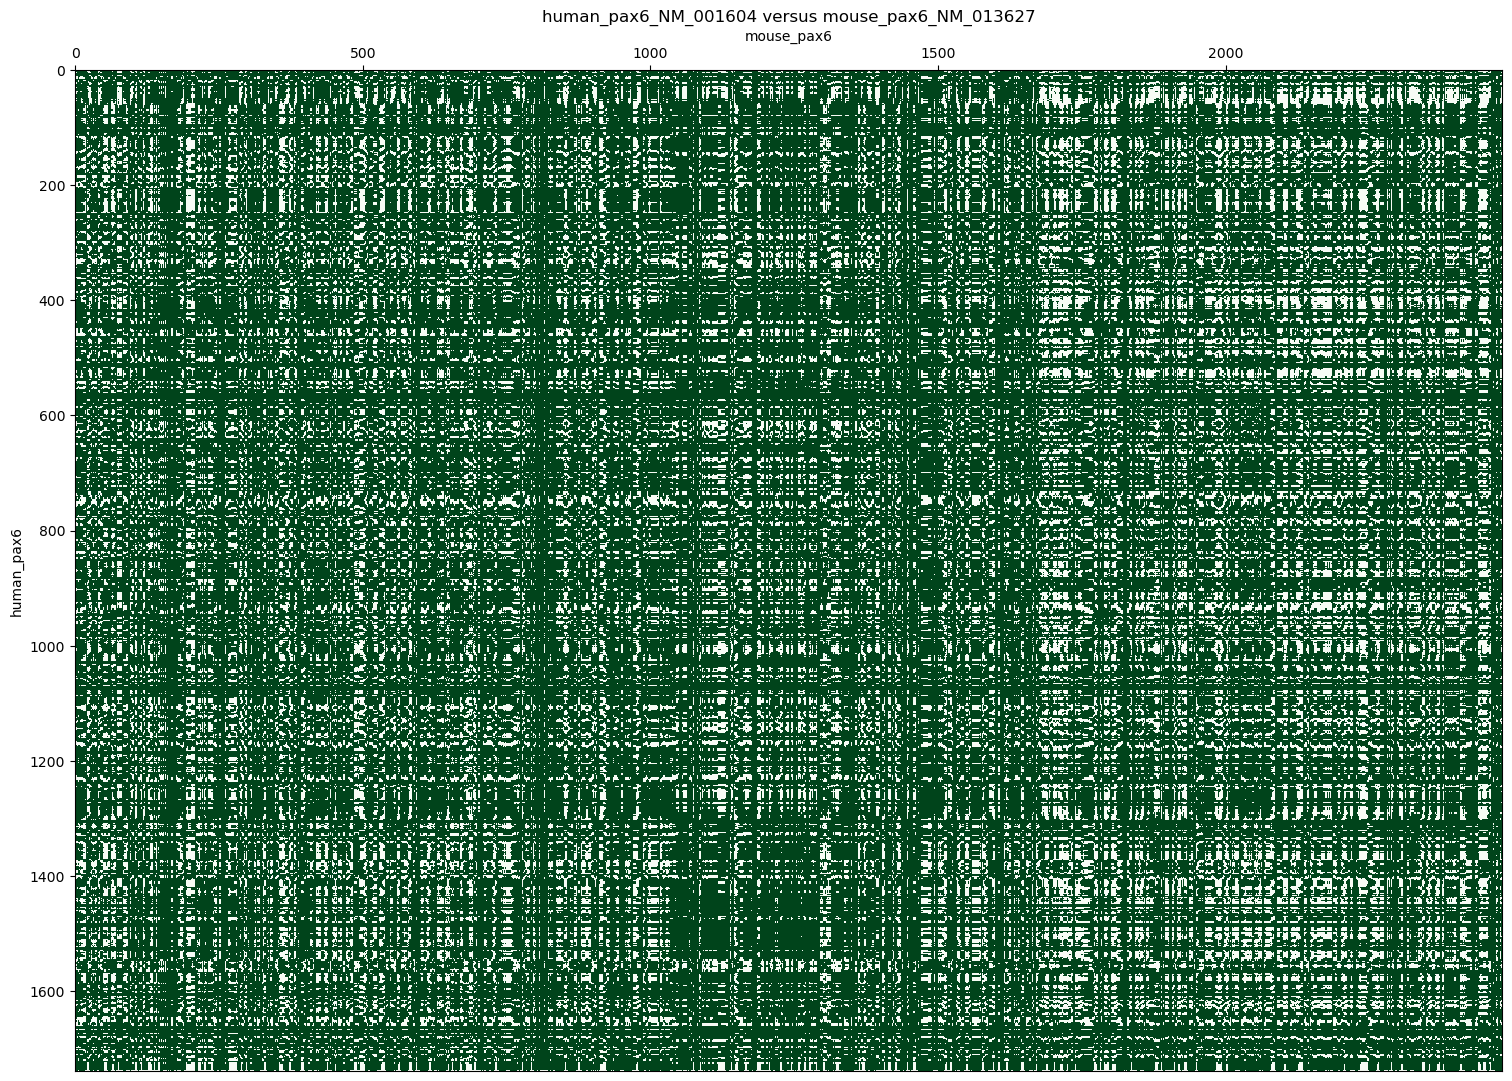

In [15]:
# human_pax6_NM_001604.fasta versus mouse_pax6_NM_013627.fasta
with open('human_pax6_NM_001604.fasta', "r") as file:
        seqA = file.read().strip().split('\n', 1)[1].replace('\n', '')

with open('mouse_pax6_NM_013627.fasta', "r") as file:
        seqB = file.read().strip().split('\n', 1)[1].replace('\n', '')

dp = dotplot(seqA, seqB, 5, 5)
dotplot2Graphics(dp, "human_pax6", "mouse_pax6", "human_pax6_NM_001604 versus mouse_pax6_NM_013627", "human_vs_mouse.png")

#### d) Write a script

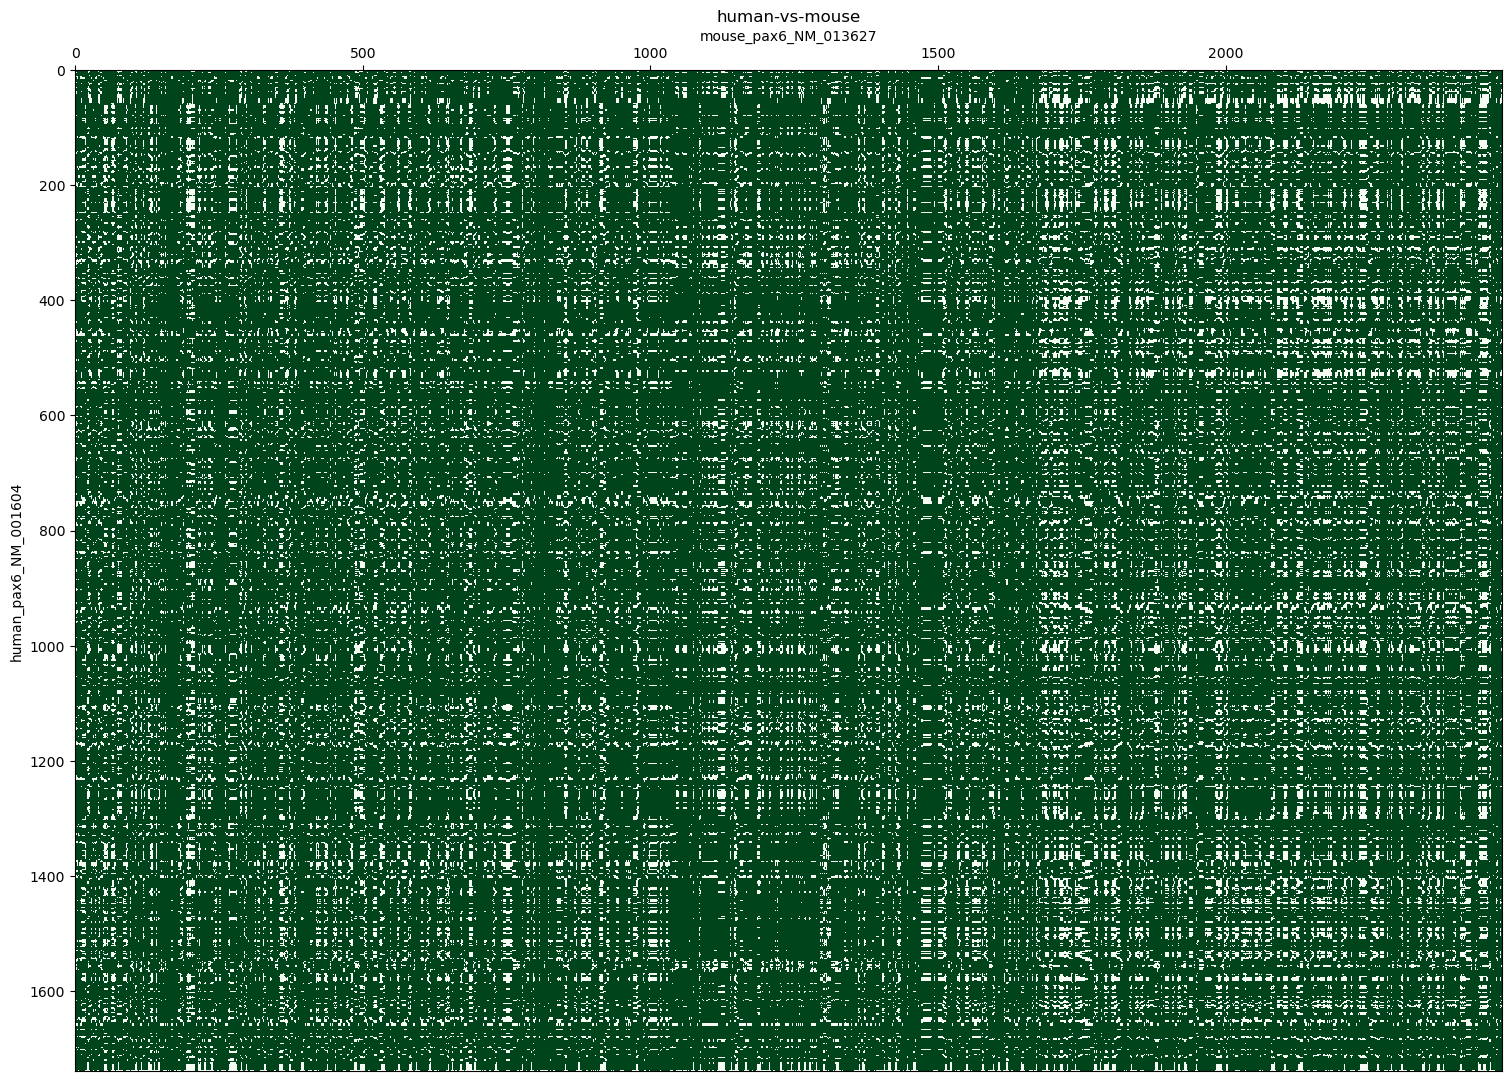

In [12]:
%run dotplot.py 5 4 human_pax6_NM_001604.fasta mouse_pax6_NM_013627.fasta human-vs-mouse human-mouse.png